# Case

- Imagine, you are a Data Scientist in vacation rental online marketplace industry
- You are given data and do modeling with machine learning Ex price prediction, rating prediction
- Besides the performance model, generate insight for stakeholders business teams
- Output
    - Your code (ipynb file)
    - Slide presentation (max 15 slides)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from math import sqrt
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split, cross_val_score

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [2]:
calendar_df = pd.read_csv("dataset/calendar.csv")
listing_df = pd.read_csv("dataset/listings.csv")

In [3]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
listing_df.head()

,Unnamed: 0,id,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,0,241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,1,953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,2,3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,3,7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,4,278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


## Data Description

In [5]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [6]:
calendar_df.shape

(1393570, 4)

In [7]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        3818 non-null   int64  
 1   id                                3818 non-null   int64  
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [8]:
listing_df.shape

(3818, 92)

### Numerical Data

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(calendar_df.select_dtypes(include=numerics).columns)
calendar_df.select_dtypes(include=numerics).head(3)

Index(['listing_id'], dtype='object')

,listing_id
0,241032
1,241032
2,241032


In [10]:
display(listing_df.select_dtypes(include=numerics).columns)
listing_df.select_dtypes(include=numerics).head(3)

Index(['Unnamed: 0', 'id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
0,0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,2,4.07
1,1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,6,1.48
2,2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2,1.15


### Non Numerical Data

In [11]:
display(calendar_df.select_dtypes(include=['object']).columns)
display(calendar_df.select_dtypes(include=['object']).head(3))

Index(['date', 'available', 'price'], dtype='object')

,date,available,price
0,2016-01-04,t,$85.00
1,2016-01-05,t,$85.00
2,2016-01-06,f,NaN


In [12]:
display(listing_df.select_dtypes(include=['object']).columns)
display(listing_df.select_dtypes(include=['object']).head(3))

Index(['last_scraped', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'is_location_exact', 'property_type', 'room_type',
       'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'has_availability', 'calendar_last_scraped', 'first_review

,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,...,t,2016-01-04,2011-11-01,2016-01-02,f,WASHINGTON,f,moderate,f,f
1,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,...,t,2016-01-04,2013-08-19,2015-12-29,f,WASHINGTON,f,strict,t,t
2,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,...,t,2016-01-04,2014-07-30,2015-09-03,f,WASHINGTON,f,strict,f,f


## Check Null and Missing Values

### Calendar dataset missing values

In [13]:
calendar_df_null = calendar_df.isnull().sum().reset_index()
calendar_df_null.columns = ['feature','missing_value']
calendar_df_null['percentage'] = round((calendar_df_null['missing_value']/len(calendar_df))*100,2)
calendar_df_null = calendar_df_null.sort_values('percentage', ascending=False).reset_index(drop=True)
calendar_df_null

,feature,missing_value,percentage
0,price,459028,32.94
1,listing_id,0,0.00
2,date,0,0.00
3,available,0,0.00


As per above table, there are 33% of missing values for price column on dates when the listings were occupied / unavailable.

### Listings dataset missing values

In [14]:
listing_df_null = listing_df.isnull().sum().reset_index()
listing_df_null.columns = ['feature','missing_value']
listing_df_null['percentage'] = round((listing_df_null['missing_value']/len(listing_df))*100,2)
listing_df_null = listing_df_null.sort_values('percentage', ascending=False).reset_index(drop=True)
listing_df_null[listing_df_null.percentage>0]

,feature,missing_value,percentage
0,license,3818,100.00
1,square_feet,3721,97.46
2,monthly_price,2301,60.27
3,security_deposit,1952,51.13
4,weekly_price,1809,47.38
5,notes,1606,42.06
6,neighborhood_overview,1032,27.03
7,cleaning_fee,1030,26.98
8,transit,934,24.46
9,host_about,859,22.50


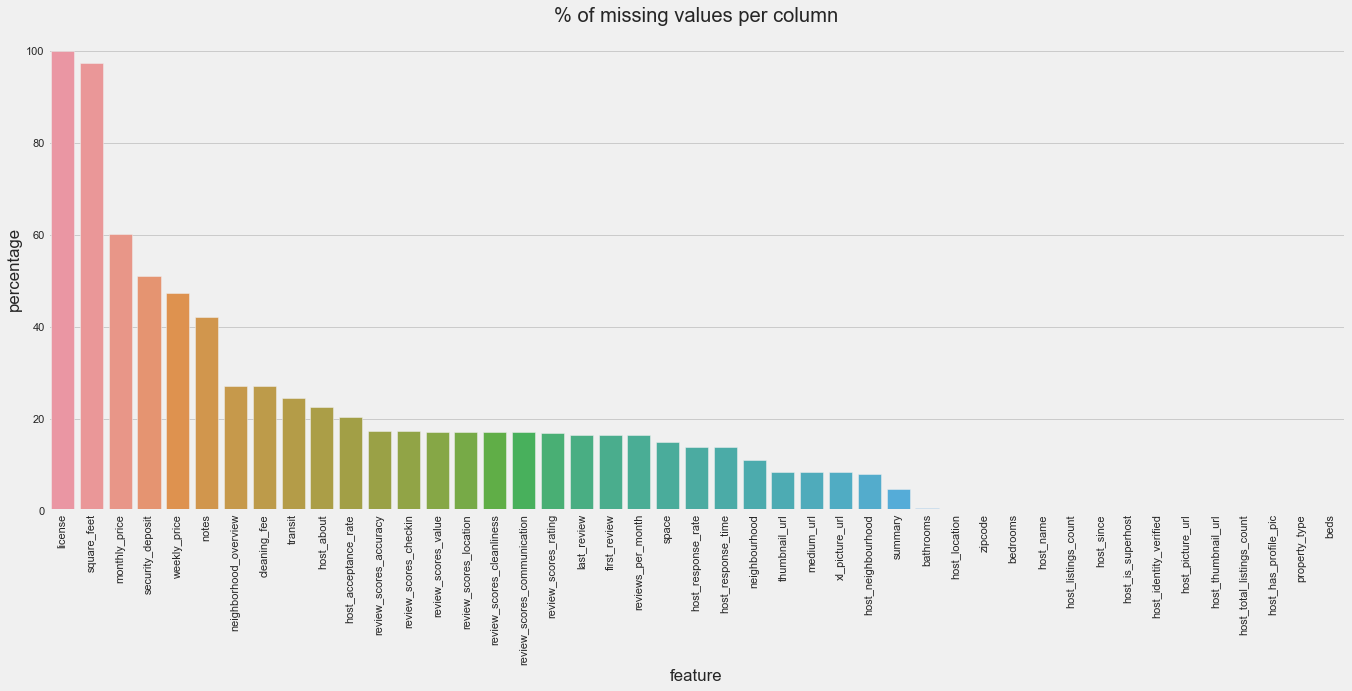

In [15]:
ax = sns.barplot(x='feature',y='percentage', data=listing_df_null[listing_df_null.percentage>0])
ax.set_title('% of missing values per column')
for item in ax.get_xticklabels():
    item.set_rotation(90)

As per table and bar plot above, we don't have information on 'license' and 'square_feet' column. Some other columns like 'weekly_price', 'monthly_price', 'security_deposit', and 'notes' have more than 40% of missing values. We will drop such columns which have very little information.

# Exploratory Data Analysis

## Feature Engineering / Data Preprocessing

**Check first and last date of calendar dataset**

In [16]:
first_date = calendar_df['date'].min()
first_date

'2016-01-04'

In [17]:
last_date = calendar_df['date'].max()
last_date

'2017-01-02'

**Check number of rows/days for each listing_id** 

In [18]:
calendar_df['listing_id'].value_counts()

6752031     365
7404370     365
1259305     365
4672934     365
10310373    365
           ... 
9999759     365
9048029     365
8441477     365
7984550     365
9484823     365
Name: listing_id, Length: 3818, dtype: int64

In [19]:
#check listing_id with less than 365 days of entry
sum(list(calendar_df['listing_id'].value_counts()<365))

0

**Check number of listings are same in calendar and listings dataset**

In [20]:
len(listing_df['id'].unique())

3818

In [21]:
len(listing_df['id'].unique()) == len(listing_df)

True

In [22]:
len(listing_df) == len(calendar_df)//365

True

**Merge calendar and listings dataset**

In [23]:
#rename the 'id' column in listings.csv to 'listing_id'
listing_df = listing_df.rename(index=str, columns = {'id':'listing_id'})

In [24]:
#merge datasets
df = pd.merge(calendar_df, listing_df, on = 'listing_id')

### Delete unnecessary columns

In [25]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [26]:
df = df.drop(['host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated',
                   'last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'price_y',
                  'reviews_per_month'], axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 38 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   listing_id                        1393570 non-null  int64  
 1   date                              1393570 non-null  object 
 2   available                         1393570 non-null  object 
 3   price_x                           934542 non-null   object 
 4   host_since                        1392840 non-null  object 
 5   host_response_time                1202675 non-null  object 
 6   host_response_rate                1202675 non-null  object 
 7   host_is_superhost                 1392840 non-null  object 
 8   host_listings_count               1392840 non-null  float64
 9   host_verifications                1393570 non-null  object 
 10  host_has_profile_pic              1392840 non-null  object 
 11  host_identity_verified            139

**Convert price to number**

In [28]:
df['price'] = df['price_x'].str.replace('[$, ]', '').astype(float)
df = df.drop(columns=['price_x'])

**Convert date from the calendar into month and year, and drop the date column**

In [29]:
df['month'] = df.apply(lambda row: int(row['date'].split('-')[1]),axis=1)
df['year'] = df.apply(lambda row: int(row['date'].split('-')[0]), axis=1)
df = df.drop(columns = ['date'])

**Convert host_since date into number**

In [30]:
def get_host_since_year(row):
    ''' Get year from a date represented as a string '''
    try:
        host_since = int(row['host_since'].split('-')[0])
    except:
        host_since = np.nan
    return host_since

df['host_since_year'] = df.apply(lambda row: get_host_since_year(row),axis=1)
df = df.drop(columns = ['host_since'])

**Convert host_response_rate into number**

In [31]:
df['host_response_rate_num'] = df['host_response_rate'].str.replace("%", "").astype("float")
df = df.drop(columns = ['host_response_rate'])

### Filling Missing Values

**host_since_year**

In [32]:
df['host_since_year'].fillna(df['host_since_year'].mean(), inplace = True)

**host_response_rate_num**

In [33]:
#description of host_response_rate_num column
df['host_response_rate_num'].describe().apply(lambda x: format(x, 'f'))

count    1202675.000000
mean          94.886798
std           11.864909
min           17.000000
25%           98.000000
50%          100.000000
75%          100.000000
max          100.000000
Name: host_response_rate_num, dtype: object

In [34]:
df_temp = df['host_response_rate_num'].value_counts().reset_index()
df_temp.columns = ['host_response_rate_num','frequency']
df_temp['percentage'] = round((df_temp['frequency']/df_temp['frequency'].sum())*100,2)
df_temp

,host_response_rate_num,frequency,percentage
0,100.0,865415,71.96
1,90.0,60225,5.01
2,80.0,37960,3.16
3,99.0,28470,2.37
4,88.0,24090,2.00
5,50.0,18980,1.58
6,94.0,16790,1.40
7,67.0,14965,1.24
8,89.0,11680,0.97
9,75.0,11680,0.97


From the above table, we can see that majority of the values in this column are in the range of 80-100, and max value of 100. As 94, the mean value, also lie in this range, we can impute mean at missing values which are 13% of the total.

In [35]:
df['host_response_rate_num'].fillna(df['host_response_rate_num'].mean(), inplace = True)

Split host_response_rate_num into two buckets 

In [36]:
#splitting the host_response_rate_num into 2 buckets with new classes for further modeling and to avoid weightage problem
df['host_response_rate_buckets'] = pd.qcut(df['host_response_rate_num'], 5, labels=False, duplicates = 'drop')

In [37]:
df = df.drop(columns = ['host_response_rate_num'])
df['host_response_rate_buckets'].value_counts()

1    924910
0    468660
Name: host_response_rate_buckets, dtype: int64

**host_listings_count**

Only 5% of this 'host_listings_count' data is missing

In [38]:
df['host_listings_count'].describe().apply(lambda x: format(x, 'f'))

count    1392840.000000
mean           7.157757
std           28.624408
min            1.000000
25%            1.000000
50%            1.000000
75%            3.000000
max          502.000000
Name: host_listings_count, dtype: object

In [39]:
df_temp = df['host_listings_count'].value_counts().reset_index()
df_temp.columns = ['host_listings_count','frequency']
df_temp['percentage'] = round((df_temp['frequency']/df_temp['frequency'].sum())*100,2)
df_temp

,host_listings_count,frequency,percentage
0,1.0,795335,57.10
1,2.0,226300,16.25
2,3.0,95265,6.84
3,4.0,55115,3.96
4,5.0,35770,2.57
5,34.0,24455,1.76
6,6.0,17520,1.26
7,48.0,16790,1.21
8,169.0,14235,1.02
9,37.0,13505,0.97


As per table above, most of the data points are in 1-48 range, filling the missing data with mean = 7, and also most of data points are below 20, hence filling the missing data with mean = 7 is a good option.

In [40]:
#fill missing values with mean value for host_listings_count
df['host_listings_count'].fillna(df['host_listings_count'].mean(), inplace = True)

**bathrooms, bedrooms, and beds**

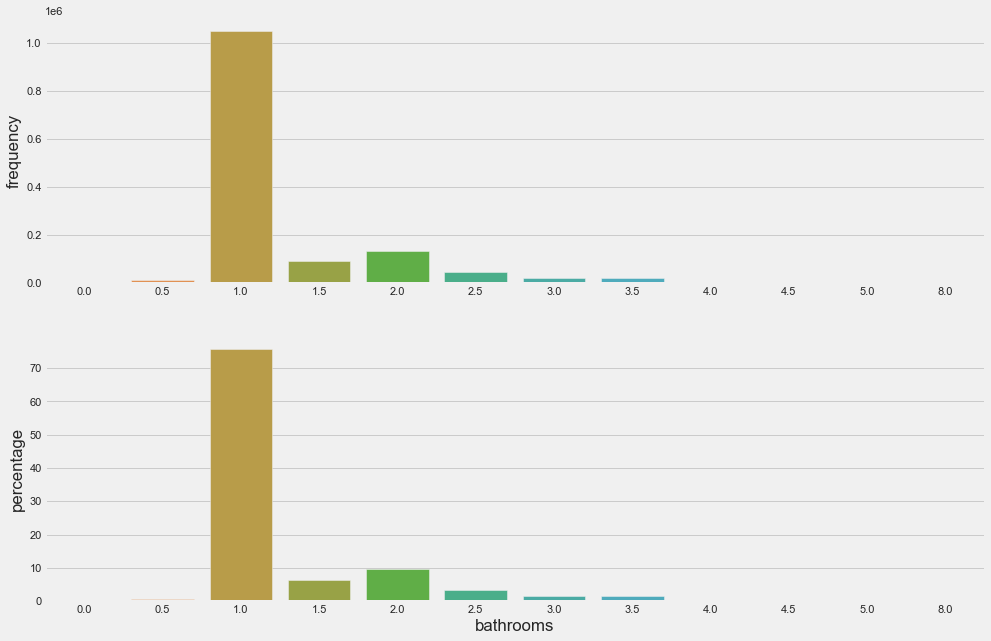

In [41]:
df_temp = df['bathrooms'].value_counts().reset_index()
df_temp.columns = ['bathrooms','frequency']
df_temp['percentage'] = round((df_temp['frequency']/df_temp['frequency'].sum())*100,2)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,10))
sns.barplot(x='bathrooms',y='frequency', data=df_temp, ax=ax1)
ax1.set_xlabel('')
sns.barplot(x='bathrooms',y='percentage', data=df_temp, ax=ax2)

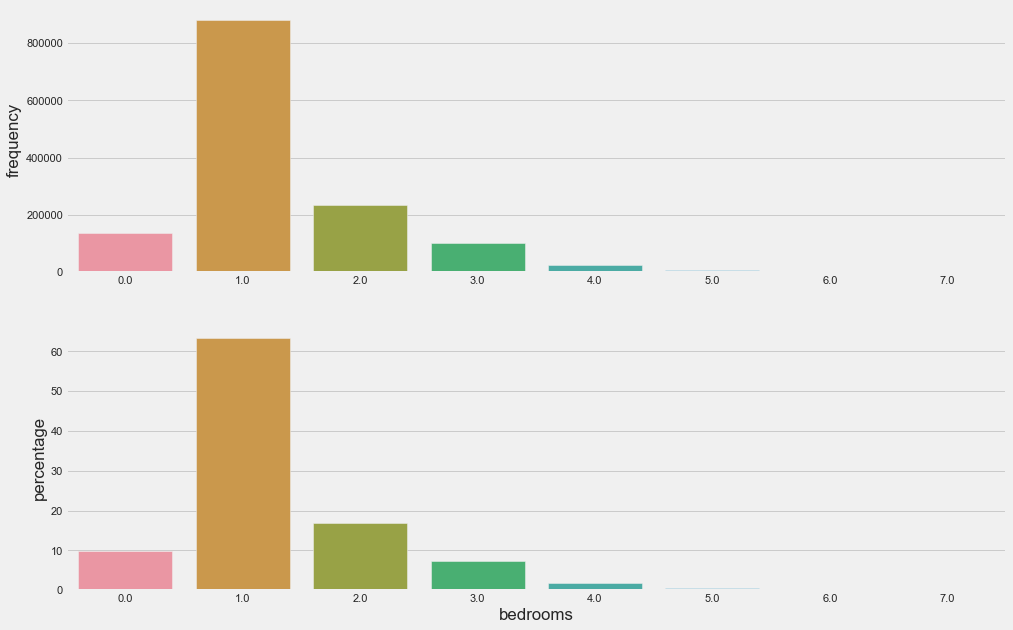

In [42]:
df_temp = df['bedrooms'].value_counts().reset_index()
df_temp.columns = ['bedrooms','frequency']
df_temp['percentage'] = round((df_temp['frequency']/df_temp['frequency'].sum())*100,2)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,10))
sns.barplot(x='bedrooms',y='frequency', data=df_temp, ax=ax1)
ax1.set_xlabel('')
sns.barplot(x='bedrooms',y='percentage', data=df_temp, ax=ax2)

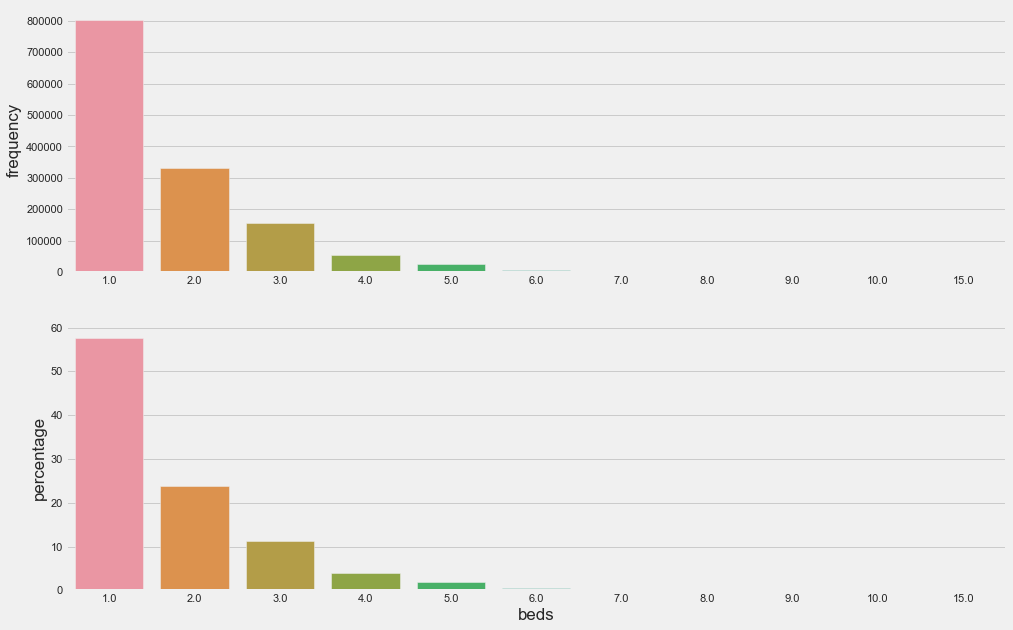

In [43]:
df_temp = df['beds'].value_counts().reset_index()
df_temp.columns = ['beds','frequency']
df_temp['percentage'] = round((df_temp['frequency']/df_temp['frequency'].sum())*100,2)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,10))
sns.barplot(x='beds',y='frequency', data=df_temp, ax=ax1)
ax1.set_xlabel('')
sns.barplot(x='beds',y='percentage', data=df_temp, ax=ax2)

For "bedrooms", "bathrooms" and "beds", we can see from charts above that values are descrete and highly variable in a very small range of number like 0-5 for bathrooms, 0-7 for bedrooms, 1-10 fo beds. Imputing a mean will disturb the data variation. Imputing median also will be a bad choice. We will imputing mode value, which is the best criteria for filling missing values, this will also maintain the variability.

In [44]:
#fill in missing values for bathrooms, bedrooms and beds with mode
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['beds'] = df['beds'].fillna(df['beds'].mode()[0])

**amenities**

In [45]:
#dummy variables for 'amenities'
df.amenities[0].replace('"','').replace("'",'').replace('{','').replace('}','').replace('[','').replace(']','').split(',')

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer']

**Creation of dummy numeric variables from columns like amenities and host_verification which are stored in the form of list**

In [46]:
def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

def split_list_into_columns(df, column_name, max_dummies_num = 10):
    ''' Split values in columns, which contain lists (for example, amenities, host_verifications, etc) '''
    
    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
      
    # split into columns
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: get_val_from_list(row, column_name, value[0]),axis=1)
        
    return

In [47]:
#split host_verifications and amenities into dummy columns and drop the original columns
split_list_into_columns(df, 'amenities')
split_list_into_columns(df, 'host_verifications')

df = df.drop(columns = ['host_verifications', 'amenities'])

**Create binary variable to know if the listing charge for extra people**

In [48]:
#extra_people into binary column for modeling(1 if there is extra fee, else 0)
df['extra_people_fee'] = df.apply(lambda row: 0.0 if row['extra_people']=='$0.00' else 1.0, axis=1)

In [49]:
#drop 'extra_people' column
df = df.drop(columns = ['extra_people'])
df = df.drop(columns = ['host_since_year'])

**Fill missing values in columns related to reviews with their respective mean**

In [50]:
#fill missing values for review scores columns
review_scores_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                     'review_scores_value']
for column in review_scores_columns:
    df[column].fillna(df[column].mean(), inplace = True)

**Overview of cleaned & prepared dataset**

In [51]:
pd.set_option('display.max_columns', 100)
df.head()

,listing_id,available,host_response_time,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price,month,year,host_response_rate_buckets,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV,host_verifications_email,host_verifications_ phone,host_verifications_ reviews,host_verifications_ facebook,host_verifications_ jumio,host_verifications_ kba,host_verifications_ linkedin,host_verifications_ google,host_verifications_ manual_offline,host_verifications_phone,extra_people_fee
0,241032,t,within a few hours,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,85.0,1,2016,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,241032,t,within a few hours,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,85.0,1,2016,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,241032,f,within a few hours,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,NaN,1,2016,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,241032,f,within a few hours,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,NaN,1,2016,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,241032,f,within a few hours,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,NaN,1,2016,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Analysis of Cleaned Dataset

**Minimum, maximum and average price of listing in the city**

In [52]:
#find minimum, maximum and average price for listing
min_price = df['price'].min()
max_price = df['price'].max()
mean_price = df['price'].mean()

print(f'Minimum price per listing is ${min_price}')
print(f'Maximum price per listing is ${max_price}')
print(f'Average price per listing is ${mean_price}')

Minimum price per listing is $10.0
Maximum price per listing is $1650.0
Average price per listing is $137.94485855103355


**Average price for each listing**

In [53]:
#get the average price for each listing
mean_price_for_listing = df.groupby('listing_id').mean()['price']

In [54]:
mean_price_for_listing

listing_id
3335        120.000000
4291         82.000000
5682         53.944984
6606         92.849315
7369         85.000000
               ...    
10332096     40.000000
10334184    120.000000
10339144           NaN
10339145    237.904110
10340165     43.000000
Name: price, Length: 3818, dtype: float64

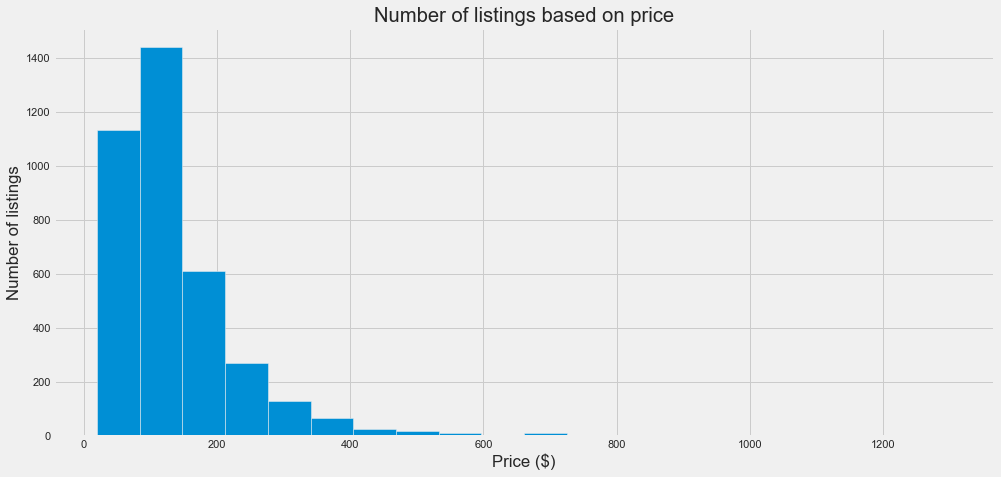

In [55]:
plt.figure(figsize=(15,7))
plt.hist(mean_price_for_listing, bins=20)
plt.ylabel('Number of listings')
plt.xlabel('Price ($)')
plt.title('Number of listings based on price')
plt.savefig('fig/Price_distribution.png')
plt.show()

From the above histogram we can conclude that, the majority of listings are concentrated around $50-150

**Average number of reviews posted for each listing**

In [56]:
#average number of reviews per listing
avg_num_reviews = df.groupby('listing_id').mean()['number_of_reviews']

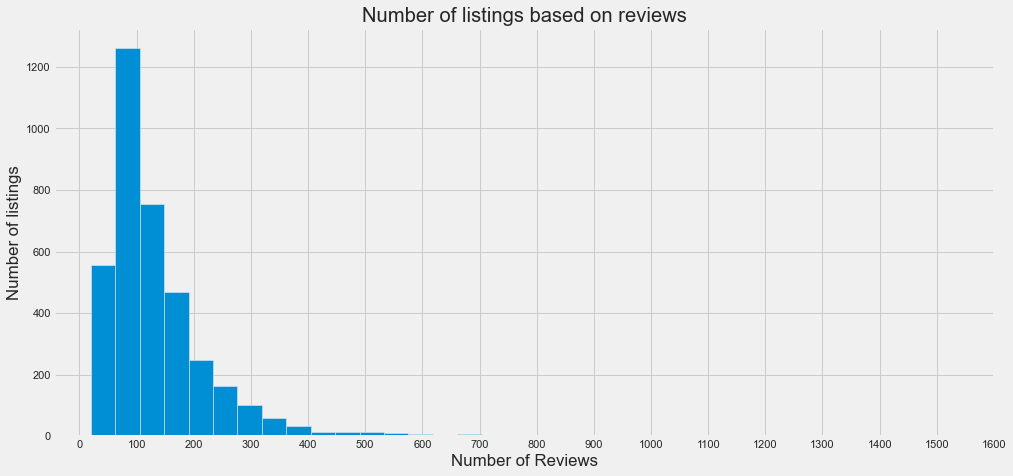

In [57]:
plt.figure(figsize=(15,7))
plt.hist(mean_price_for_listing, bins=30)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Number of Reviews')
plt.title('Number of listings based on reviews')
plt.savefig('fig/Reviews_distribution.png')
plt.show()

The majority of listings are concentrated around 10-180 reviews

**Registered listings per month**

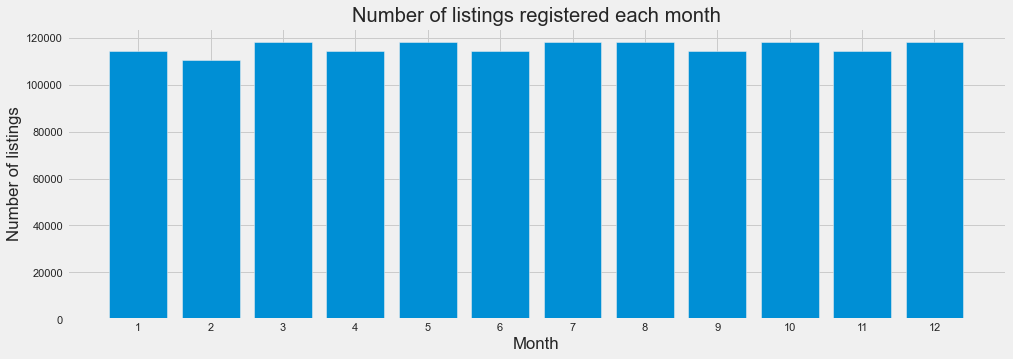

In [58]:
#get number of registered listings, irrespective of available or unavailable for each month
grouped_month = df.groupby(['month'])
num__listing_per_month = [len(grouped_month.get_group(i)['listing_id']) for i in range(1,13)]

plt.figure(figsize=(15,5))
plt.bar(np.arange(1,13,step=1), num__listing_per_month)   #color=np.random.rand(12,3)
plt.xticks(np.arange(1,13,step=1))
plt.title('Number of listings registered each month')
plt.xlabel('Month')
plt.ylabel('Number of listings')
plt.savefig('fig/Number of listings registered each month.png')
plt.show()

We can see the trend of number of listings that are registered every month. It can be seen that the number of listings are low in February, April, September, and Novenmber as these months we see surge in number of visitors.

**Available and not available listings for each month**

In [59]:
#get number of available and not available listings per month 
num_listing_per_month = df.groupby(['month','available'])['listing_id'].unique()

In [60]:
num_listings_available_per_month = [len(num_listing_per_month[i]['t']) for i in range(1,13)]
num_listings_not_available_per_month = [len(num_listing_per_month[i]['f']) for i in range(1,13)]

In [61]:
num_listings_available_per_month, num_listings_not_available_per_month

([3623, 2895, 2950, 3002, 2705, 2720, 2503, 2561, 2649, 2694, 2771, 2866],
 [3007, 1933, 1573, 1652, 1525, 1520, 1665, 1523, 1365, 1216, 1141, 1060])

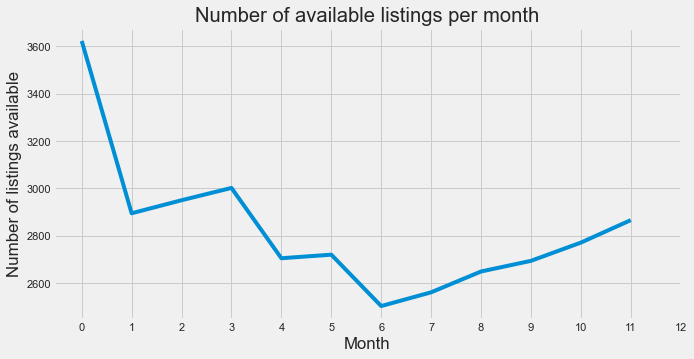

In [62]:
plt.figure(figsize=(10,5))
plt.plot(num_listings_available_per_month)
plt.xticks(np.arange(0, 13, step=1))
plt.ylabel('Number of listings available')
plt.xlabel('Month')
plt.title('Number of available listings per month')
plt.savefig('fig/number of available listings.png')
plt.show()

The diagram above shows us number of listings based on month. We can see that number of available listings for reservation is tends to be the lowest in summer (June to August).

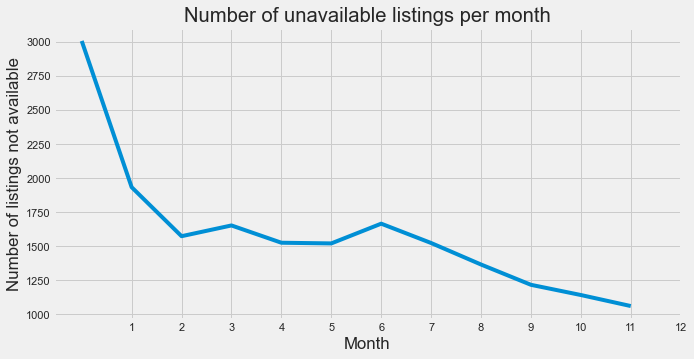

In [63]:
plt.figure(figsize=(10,5))
plt.plot(num_listings_not_available_per_month)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Number of listings not available')
plt.xlabel('Month')
plt.title('Number of unavailable listings per month')
plt.savefig('fig/number of listings not available.png')
plt.show()

From the diagram we can see that summer and year end are the busiest time of the year as number of unavailable listings are low in this time

**Average price per month**

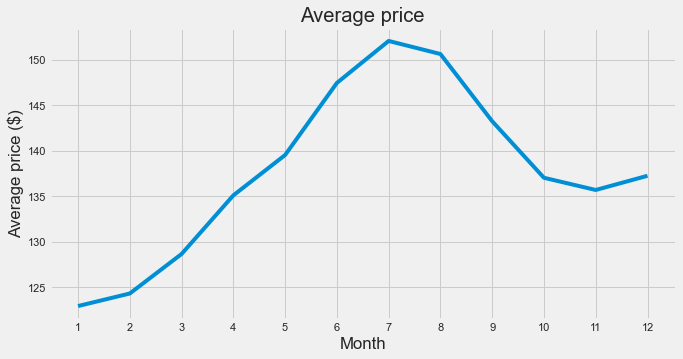

In [64]:
#find average price by month
average_price_by_month = df.groupby(['month'])['price'].mean()

#plot
plt.figure(figsize=(10,5))
plt.plot(average_price_by_month)
plt.ylabel('Average price ($)')
plt.xlabel('Month')
plt.title('Average price')
plt.xticks(np.arange(1, 13, step=1))
plt.savefig('fig/average price for month')

plt.show()

Based on diagram above, listing prices raise significantly in summer, this is due to the fact that there are less listings available for reservation. There is also some increase in December. This tells us that summer and winter holidays should be the busiest times to visit the city Seattle.

**Prices based on Neighbourhood**

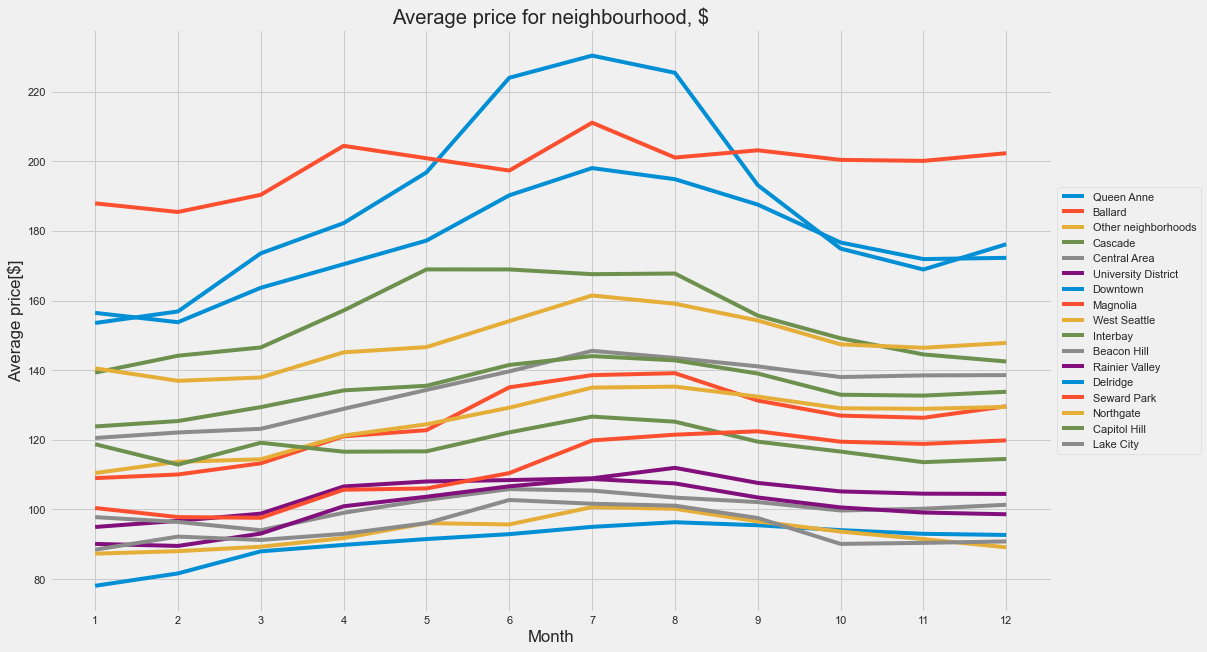

In [65]:
#list of neighbourhoods
neighbourhoods = df['neighbourhood_group_cleansed'].unique()

#prices by month and neighbourhood
price_by_month_neighbourhood = df.groupby(['month','neighbourhood_group_cleansed']).mean().reset_index()

#plot prices for each neighbourhood
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)

for neighbourhood in neighbourhoods:
    ax.plot(price_by_month_neighbourhood[price_by_month_neighbourhood['neighbourhood_group_cleansed'] == neighbourhood]['month'],
             price_by_month_neighbourhood[price_by_month_neighbourhood['neighbourhood_group_cleansed'] == neighbourhood]['price'],
             label = neighbourhood)
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Average price[$]')
plt.xlabel('Month')
plt.xticks(np.arange(1, 13, step=1))
plt.title('Average price for neighbourhood, $')
plt.savefig('fig/average price for neighbourhood.png')
plt.show()

As per above diagram, we can see that prices differ depending on the location (neighbourhood). The highest average prices are in Downtown. And also each neighbourhood prices tend to raise in summer.

**Number of listings for each accommodates type**

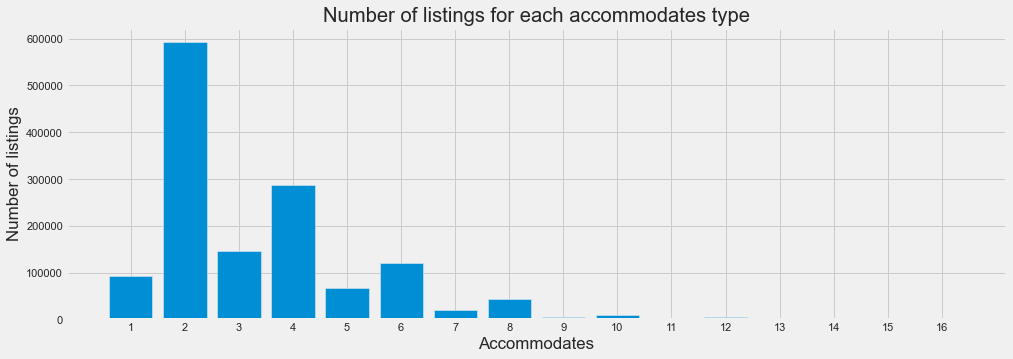

In [66]:
#total number of listings for each accommodates type(number of accommodations)
num_listing_accommodates = [len(df.groupby(['accommodates']).get_group(i)['listing_id']) for i in sorted(df['accommodates'].unique())]
plt.figure(figsize=(15,5))
plt.bar(sorted(df['accommodates'].unique()), num_listing_accommodates)   #color=np.random.rand(12,3)
plt.xticks(range(1,sorted(df['accommodates'].unique())[-1]+1))
plt.title('Number of listings for each accommodates type')
plt.xlabel('Accommodates')
plt.ylabel('Number of listings')
plt.savefig('fig/Number of listings for each accommodates type.png')
plt.show()

The maximum number of listings is for 2 accommodates.

**Average price for each accommodates type**

In [67]:
grouped_accommodate_mean_price = df.groupby(['accommodates'])['price'].mean()
average_price_per_accommodate = [grouped_accommodate_mean_price[i] for i in sorted(df['accommodates'].unique())]

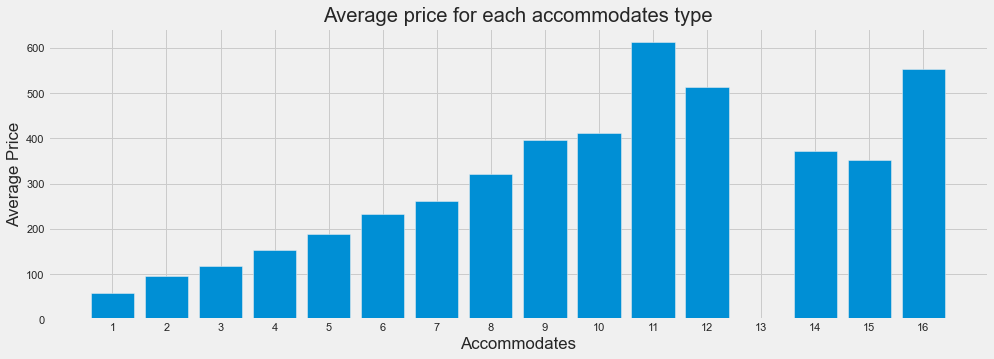

In [68]:
plt.figure(figsize=(15,5))
plt.bar(sorted(df['accommodates'].unique()), average_price_per_accommodate)   #color=np.random.rand(12,3)
plt.xticks(range(1,sorted(df['accommodates'].unique())[-1]+1))
plt.title('Average price for each accommodates type')
plt.xlabel('Accommodates')
plt.ylabel('Average Price')
plt.savefig('fig/Average price for each accommodates type.png')
plt.show()

As per above diagram, we can see as the number of accommodates increased, the price also raised. 

**Occupancy rate**

In [69]:
# convert 'date' column to pandas timestamps
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

In [70]:
#occupancy rate over time. Number of listings booked per day
grouped_date = calendar_df.groupby(['date'])
occupancy_rate = []
for x in calendar_df['date'].unique():
    calendar_df_tmp = grouped_date.get_group(pd.Timestamp(x))
    occupancy_rate.append(len(calendar_df_tmp[calendar_df_tmp['available'] == 'f']) / len(calendar_df_tmp))

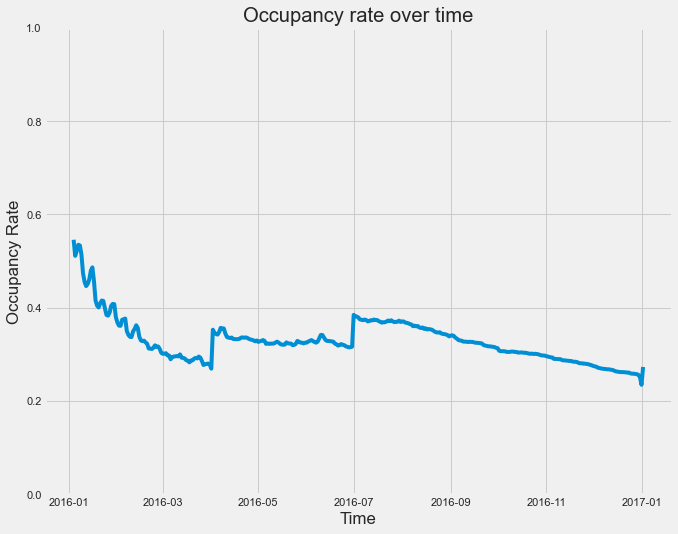

In [71]:
#occupancy rate over time
plt.figure(figsize=(10,8))
plt.plot_date(calendar_df['date'].unique(), occupancy_rate, linestyle='solid', marker='None');
plt.ylim(0,1)
plt.title('Occupancy rate over time')
plt.xlabel('Time')
plt.ylabel('Occupancy Rate')
plt.savefig('fig/occupancy rate over time.png')
plt.show()

We can see again that the occupancy rate is high in summer and winter (year end).

### Correlation between Price and Other Features

In [72]:
#remove rows where price_x == nan, because price will be used as response column for later modelling``
df = df.dropna(subset=['price'])

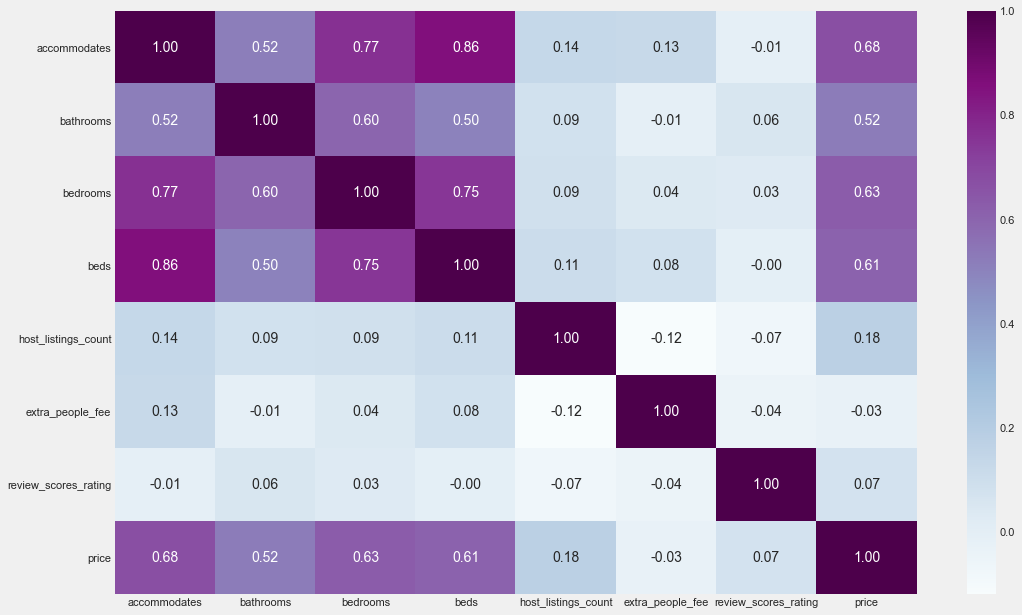

In [73]:
#Numerical columns to find out correlation
cols = ['accommodates','bathrooms','bedrooms','beds',
        'host_listings_count', 'extra_people_fee',
        'review_scores_rating', 'price']

corr_= df[cols].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

From the correlations heatmap diagram we can see that price is correlated with number of accomodates, bathrooms, bedrooms and beds.

### Output Analysis

In [74]:
df_temp = df['price'].value_counts().reset_index()
df_temp.columns = ['price','frequency']
df_temp['price'] = round((df_temp['frequency']/df_temp['frequency'].sum())*100,2)
df_temp.head(2)

,price,frequency
0,3.92,36646
1,3.40,31755


In [75]:
df['price'].describe()

count    934542.000000
mean        137.944859
std         105.062870
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64

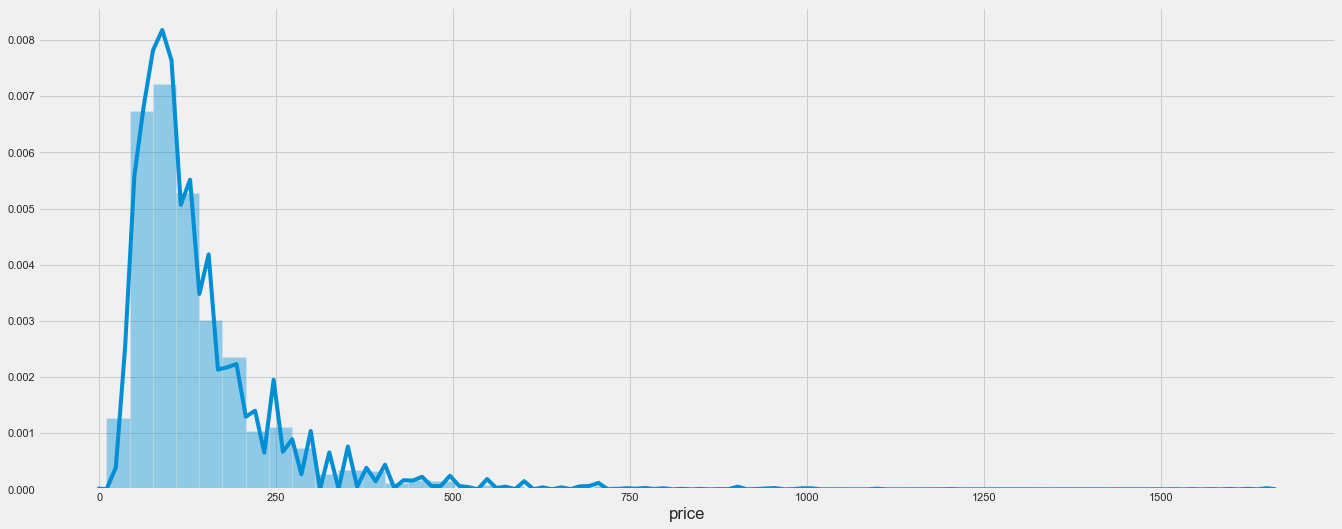

In [76]:
sns.distplot(df['price'], kde=True)
plt.show()

In [77]:
df[df['price']==0]

,listing_id,available,host_response_time,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price,month,year,host_response_rate_buckets,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV,host_verifications_email,host_verifications_ phone,host_verifications_ reviews,host_verifications_ facebook,host_verifications_ jumio,host_verifications_ kba,host_verifications_ linkedin,host_verifications_ google,host_verifications_ manual_offline,host_verifications_phone,extra_people_fee


## Turn categorical columns into dummies

In [78]:
cat_columns = list(df.select_dtypes(include=['object']).columns)
    
for col in  cat_columns:
    df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=True)], axis=1)
#drop listing_id and year columns
df = df.drop(columns = ['listing_id', 'year'])

In [79]:
# Confirm wheather all columns are numeric or not
numeric_dtypes = ['int64','float64', 'int32', 'float32', 'uint8']
for col in df.columns:
    if df[col].dtypes not in numeric_dtypes:
        print(f'{col} is not numeric')
        print("All the columns are not numeric, can't fit any model on this data. Change the data to all numeric values")
        break

In [80]:
#final dataframe overview before modelling
df.head()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,price,month,host_response_rate_buckets,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV,host_verifications_email,host_verifications_ phone,host_verifications_ reviews,host_verifications_ facebook,host_verifications_ jumio,host_verifications_ kba,host_verifications_ linkedin,host_verifications_ google,host_verifications_ manual_offline,host_verifications_phone,extra_people_fee,available_nan,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_t,host_has_profile_pic_nan,...,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_group_cleansed_nan,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,property_type_nan,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_t,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan
0,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,85.0,1,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,85.0,1,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
9,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,85.0,1,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
10,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,85.0,1,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
14,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,85.0,1,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [81]:
#check if there are any missing values
df.isnull().sum().max()

0

# Sampling Dataset

In [82]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['price'], axis=1)
y = df['price']

sc_x = StandardScaler()

In [83]:
X.head(2)

,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,month,host_response_rate_buckets,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV,host_verifications_email,host_verifications_ phone,host_verifications_ reviews,host_verifications_ facebook,host_verifications_ jumio,host_verifications_ kba,host_verifications_ linkedin,host_verifications_ google,host_verifications_ manual_offline,host_verifications_phone,extra_people_fee,available_nan,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_t,...,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_group_cleansed_nan,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,property_type_nan,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_t,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan
0,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,1,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,1,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Modelling

In [85]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Predict

In [86]:
y_pred = model.predict(X_test)

# Evaluation

In [87]:
def rmse(targets,predictions):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val

In [88]:
mae = mean_absolute_error(y_test, y_pred)
rmse = rmse(y_test, y_pred)

mae, rmse

(39.14492444547206, 63.635691791911924)

In [89]:
df['price'].describe()

count    934542.000000
mean        137.944859
std         105.062870
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64

In [90]:
df_pred = pd.DataFrame({'predicted':y_pred,'actual':y_test})
print(len(df_pred))
df_pred.head()

280363


,predicted,actual
515523,92.773816,75.0
216540,76.512326,75.0
374275,42.305644,68.0
1290569,160.361479,90.0
133258,129.106400,88.0


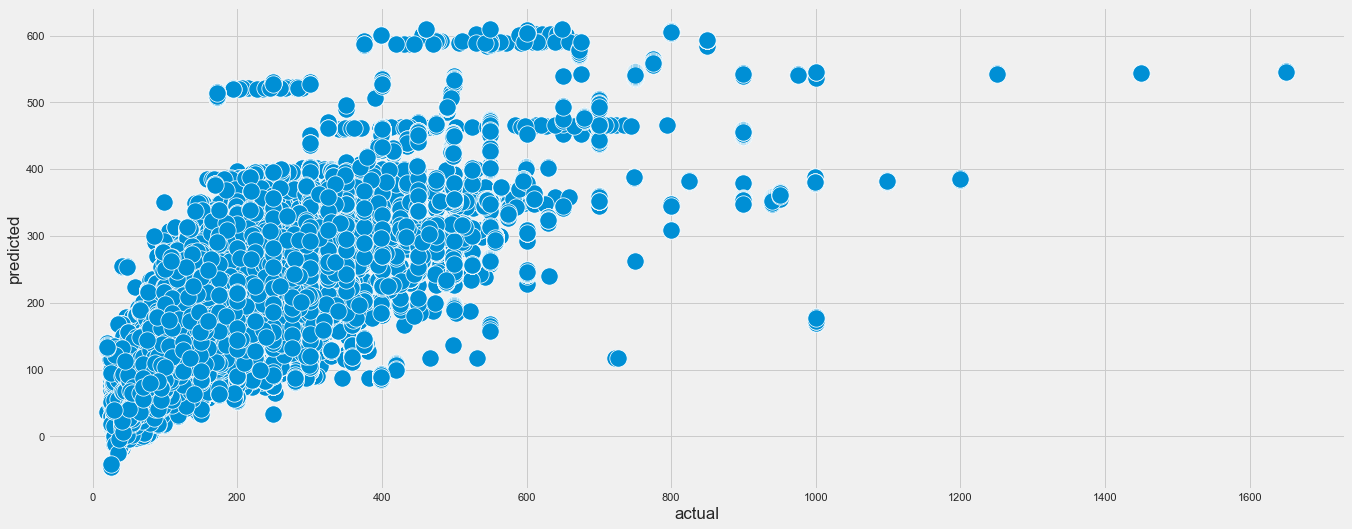

In [91]:
sns.scatterplot(x='actual', y='predicted', data=df_pred, s=300)

In [92]:
len(model.coef_), df.shape

(101, (934542, 102))

# Insight

In [93]:
model.coef_

array([ 1.95672705e-01,  1.13695815e+01,  3.41471561e+01,  2.95624859e+01,
        3.16338084e+00,  6.38020069e+00, -3.59968194e-03,  4.19156808e-04,
       -9.84277252e-02,  1.17223528e+00,  3.22383426e+00,  1.60333196e+00,
       -2.53816619e+00, -1.06468027e+00,  5.67460320e+00, -8.81199084e+00,
       -4.05649062e-03,  8.67358147e-01, -1.70286054e+00,  6.42738881e+00,
        3.92709986e+00,  4.10660988e-01, -4.16229996e+00,  1.44066313e-01,
       -1.67906263e-01, -1.31612938e+00,  1.68788243e+00,  2.76217939e+00,
       -1.67302931e+00,  2.29358014e+01,  2.03382083e+00, -7.69001265e+00,
        2.15856902e+00,  1.37403208e+01,  1.59391300e+01,  3.19830269e+00,
       -3.52652786e+00,  7.88197163e+00,  2.22234887e+01, -1.58068451e+01,
        4.56523708e-13, -9.14928512e+00, -6.44363231e+00, -1.05540265e+01,
        1.15391311e+01,  1.46034508e+01, -2.23258034e+01, -7.61807266e+01,
       -2.23258034e+01, -1.22967882e+01, -2.23258034e+01,  9.59469174e-01,
        2.87104166e+01,  

In [94]:
df.head(2)

,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,price,month,host_response_rate_buckets,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV,host_verifications_email,host_verifications_ phone,host_verifications_ reviews,host_verifications_ facebook,host_verifications_ jumio,host_verifications_ kba,host_verifications_ linkedin,host_verifications_ google,host_verifications_ manual_offline,host_verifications_phone,extra_people_fee,available_nan,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_t,host_has_profile_pic_nan,...,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_group_cleansed_nan,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,property_type_nan,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_t,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan
0,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,85.0,1,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,85.0,1,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [95]:
col = df.drop('price', axis=1)
col = list(col)

In [96]:
for i in range(1,101):
    print(i, ' ',str(round(model.coef_[i],2)), ' - ',col[i])

1   11.37  -  accommodates
2   34.15  -  bathrooms
3   29.56  -  bedrooms
4   3.16  -  beds
5   6.38  -  guests_included
6   -0.0  -  minimum_nights
7   0.0  -  maximum_nights
8   -0.1  -  number_of_reviews
9   1.17  -  review_scores_rating
10   3.22  -  review_scores_accuracy
11   1.6  -  review_scores_cleanliness
12   -2.54  -  review_scores_checkin
13   -1.06  -  review_scores_communication
14   5.67  -  review_scores_location
15   -8.81  -  review_scores_value
16   -0.0  -  calculated_host_listings_count
17   0.87  -  month
18   -1.7  -  host_response_rate_buckets
19   6.43  -  amenities_Wireless Internet
20   3.93  -  amenities_Heating
21   0.41  -  amenities_Kitchen
22   -4.16  -  amenities_Smoke Detector
23   0.14  -  amenities_Essentials
24   -0.17  -  amenities_Dryer
25   -1.32  -  amenities_Washer
26   1.69  -  amenities_Internet
27   2.76  -  amenities_Shampoo
28   -1.67  -  amenities_TV
29   22.94  -  host_verifications_email
30   2.03  -  host_verifications_ phone
31   -7.